In [28]:
import pandas as pd

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics
 
import warnings
warnings.filterwarnings('ignore')

Importing Dataset: Perform the analysis and build a predictive model for Gold Stock Price. Using ('Open', 'High', 'Low', 'Close) from YTD.

In [29]:
df = pd.read_csv('GDX.csv')

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-03,31.420000,31.530001,31.209999,31.250000,31.250000,18828900
1,2022-01-04,31.440001,31.870001,31.309999,31.379999,31.379999,15468300
2,2022-01-05,31.709999,32.029999,30.790001,30.850000,30.850000,26211100
3,2022-01-06,30.170000,30.379999,29.740000,29.760000,29.760000,28579300
4,2022-01-07,29.959999,30.170000,29.620001,30.010000,30.010000,19982900


In [30]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,226.000000,226.000000,226.000000,226.000000,226.000000,2.260000e+02
mean,29.977655,30.443761,29.519956,29.988319,29.988319,2.501744e+07
std,5.048981,5.122279,4.994334,5.078146,5.078146,9.204820e+06
min,22.270000,22.549999,21.520000,21.860001,21.860001,9.693300e+06
25%,25.579999,25.912499,25.149999,25.552501,25.552501,1.868342e+07
50%,29.950000,30.560001,29.565001,30.045000,30.045000,2.340325e+07
75%,33.065001,33.557500,32.507500,33.284999,33.284999,2.949838e+07
max,41.279999,41.610001,40.820000,40.869999,40.869999,8.029560e+07


We have 226 rows of data available and for each row, we have 7 different features or columns.

In [31]:
df.shape

(226, 7)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       226 non-null    object 
 1   Open       226 non-null    float64
 2   High       226 non-null    float64
 3   Low        226 non-null    float64
 4   Close      226 non-null    float64
 5   Adj Close  226 non-null    float64
 6   Volume     226 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 12.5+ KB


Perform an EDA of the Gold Stock Price showing a downward trend.

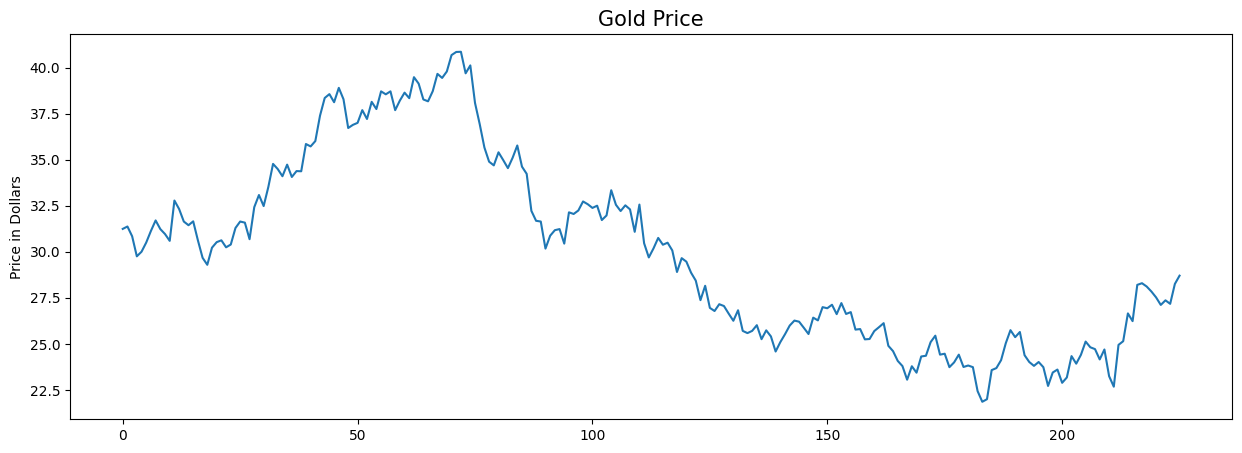

In [33]:
plt.figure(figsize=(15, 5))
plt.plot(df['Close'])
plt.title("Gold Price", fontsize=15)
plt.ylabel("Price in Dollars")
plt.show()

All rows of columns 'Close' and 'Adj. Close' have the same redundant data. 

In [34]:
df[df['Close'] == df['Adj Close']].shape

(226, 7)

In [35]:
df = df.drop(['Adj Close'], axis=1)

Drop all the null values.

In [36]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

Distribution plot of OHLC Data.

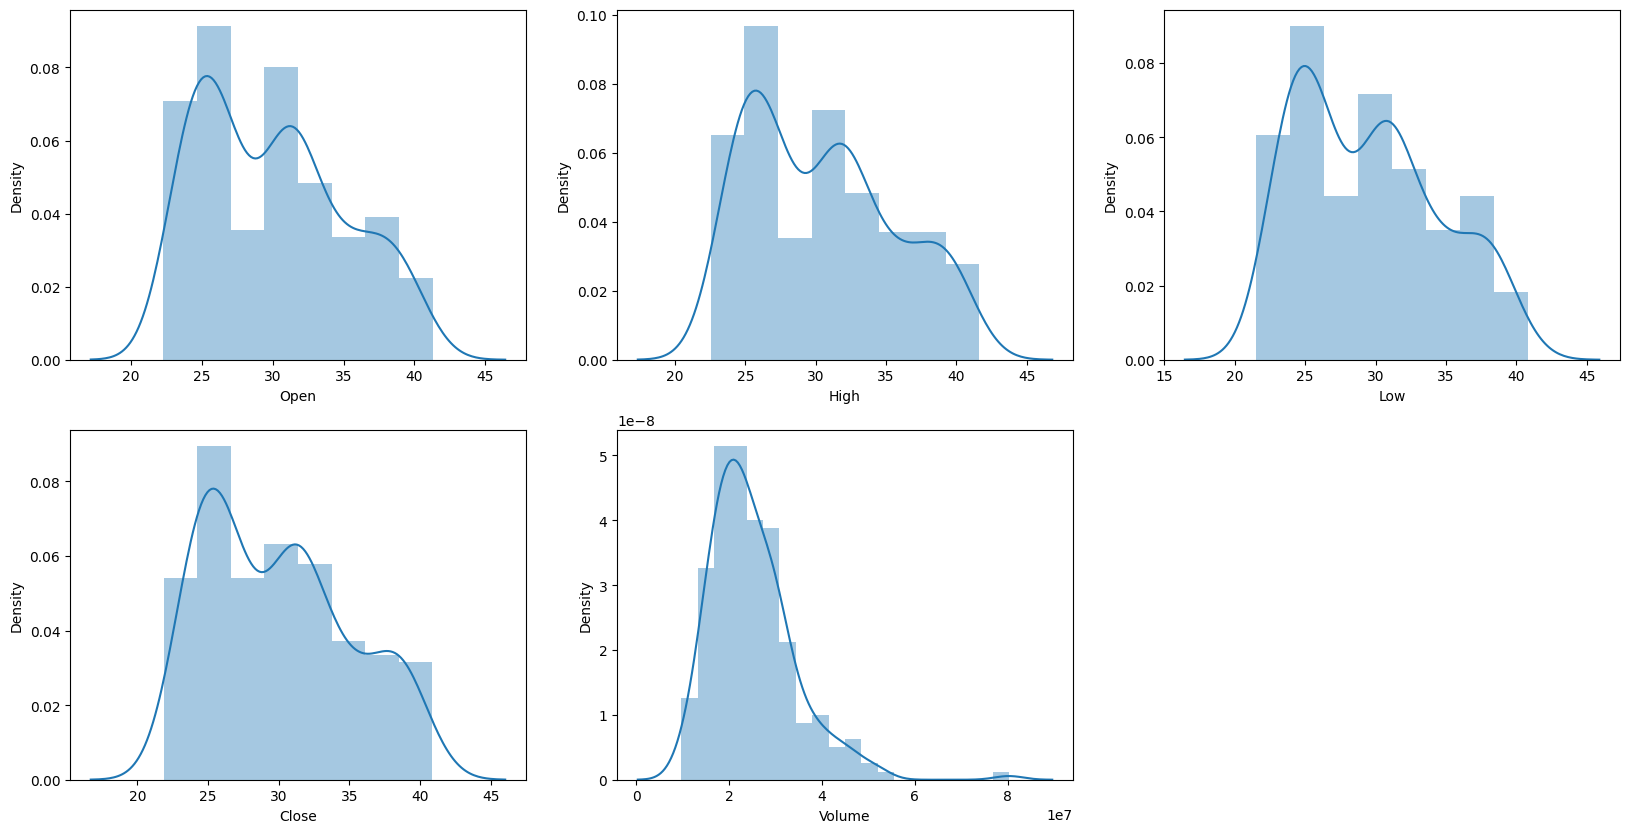

In [37]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']

plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(2, 3, i+1)
    sb.distplot(df[col])
plt.show()

Boxplots.

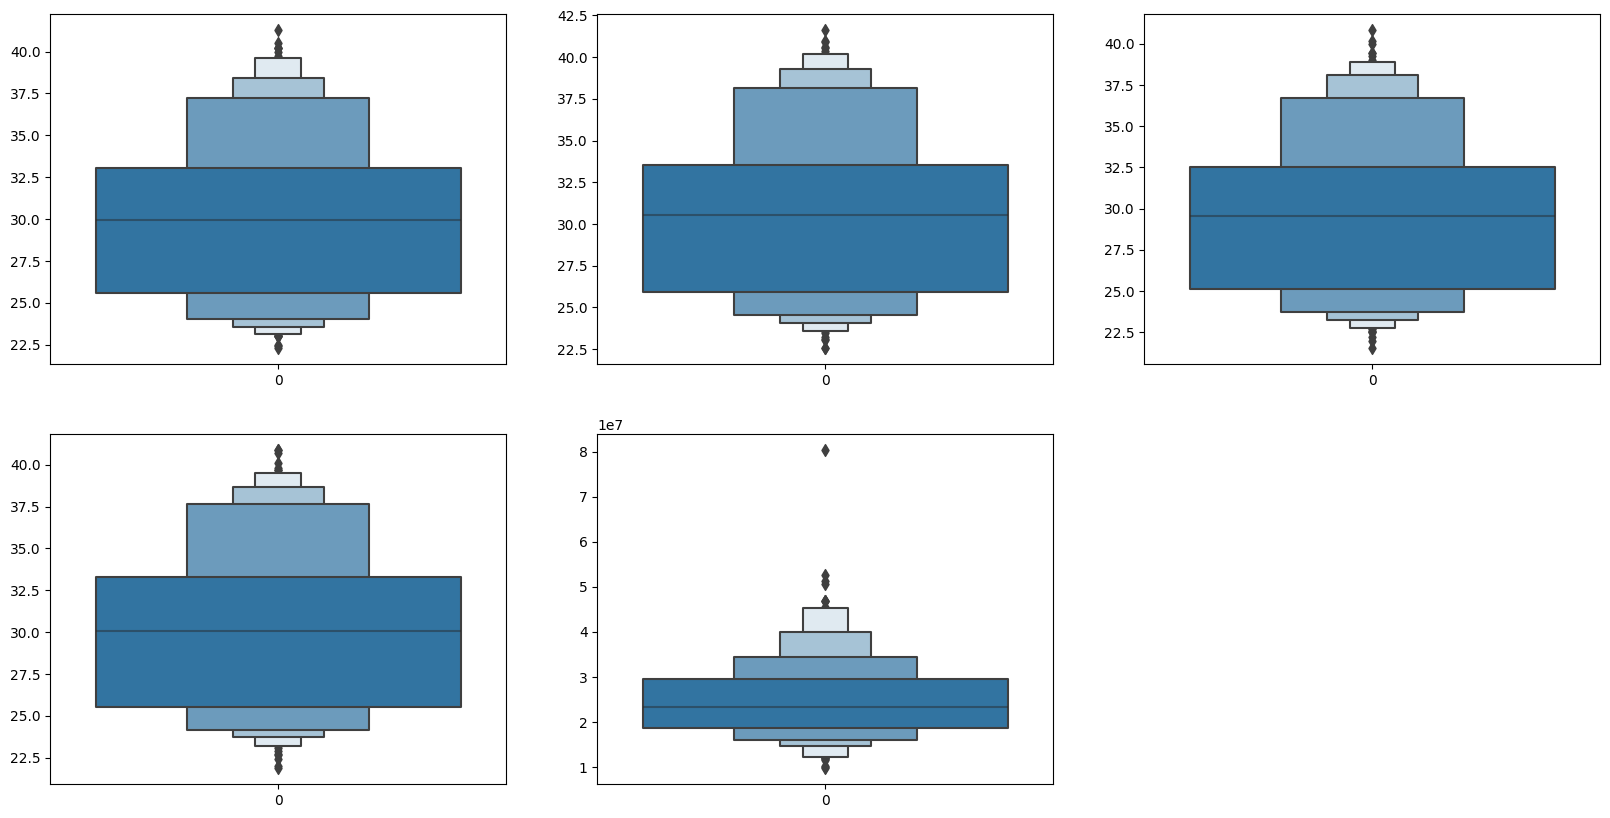

In [38]:
plt.subplots(figsize=(20, 10))

for i, col in enumerate(features):
    plt.subplot(2, 3, i + 1)
    sb.boxenplot(df[col])
plt.show()

In [39]:
df.head()

,Date,Open,High,Low,Close,Volume
0,2022-01-03,31.420000,31.530001,31.209999,31.250000,18828900
1,2022-01-04,31.440001,31.870001,31.309999,31.379999,15468300
2,2022-01-05,31.709999,32.029999,30.790001,30.850000,26211100
3,2022-01-06,30.170000,30.379999,29.740000,29.760000,28579300
4,2022-01-07,29.959999,30.170000,29.620001,30.010000,19982900


Three columns for 'day', 'month, 'year' derived from the 'Date' column.

In [40]:
splitted = df['Date'].str.split('-', expand=True)

df['day'] = splitted[1].astype('int')
df['year'] = splitted[0].astype('int')
df['month'] = splitted[2].astype('int')


df.head()

,Date,Open,High,Low,Close,Volume,day,year,month
0,2022-01-03,31.420000,31.530001,31.209999,31.250000,18828900,1,2022,3
1,2022-01-04,31.440001,31.870001,31.309999,31.379999,15468300,1,2022,4
2,2022-01-05,31.709999,32.029999,30.790001,30.850000,26211100,1,2022,5
3,2022-01-06,30.170000,30.379999,29.740000,29.760000,28579300,1,2022,6
4,2022-01-07,29.959999,30.170000,29.620001,30.010000,19982900,1,2022,7


In [41]:
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()

,Date,Open,High,Low,Close,Volume,day,year,month,is_quarter_end
0,2022-01-03,31.420000,31.530001,31.209999,31.250000,18828900,1,2022,3,1
1,2022-01-04,31.440001,31.870001,31.309999,31.379999,15468300,1,2022,4,0
2,2022-01-05,31.709999,32.029999,30.790001,30.850000,26211100,1,2022,5,0
3,2022-01-06,30.170000,30.379999,29.740000,29.760000,28579300,1,2022,6,1
4,2022-01-07,29.959999,30.170000,29.620001,30.010000,19982900,1,2022,7,0


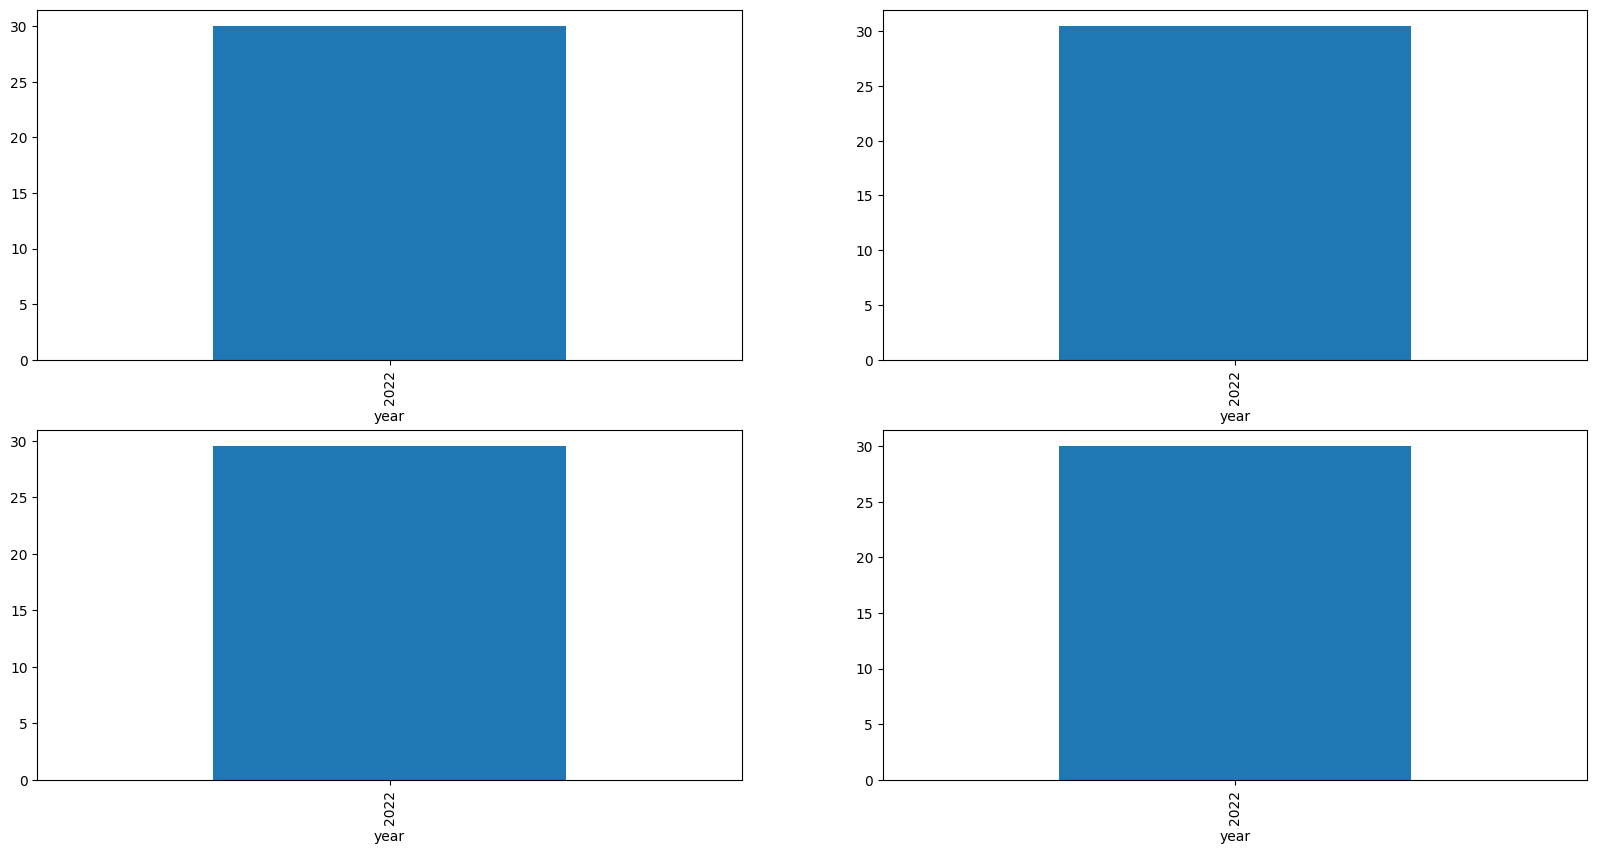

In [42]:
data_grouped = df.groupby('year').mean()
plt.subplots(figsize=(20, 10))

for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
    plt.subplot(2, 2, i+1)
    data_grouped[col].plot.bar()
plt.show()

In [43]:
df.groupby('is_quarter_end').mean()

,Open,High,Low,Close,Volume,day,year,month
is_quarter_end,,,,,,,,
0,30.021484,30.541806,29.590194,30.092903,2.554978e+07,5.941935,2022.0,15.245161
1,29.881972,30.229718,29.366620,29.760000,2.385527e+07,6.014085,2022.0,15.845070


Added more columns that will help in the training model. Added wheter to buy or not to predict this only.

In [44]:
df['open-close'] = df['Open'] - df['Close']
df['low-high'] = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

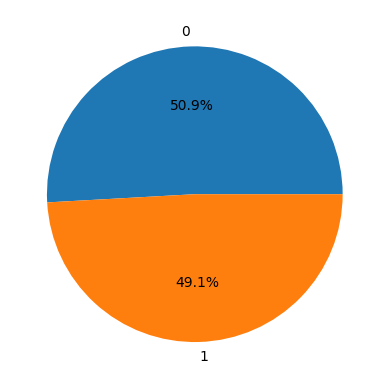

In [45]:
plt.pie(df['target'].value_counts().values,
        labels=[0, 1], autopct='%1.1f%%')
plt.show()   

Heatmap.

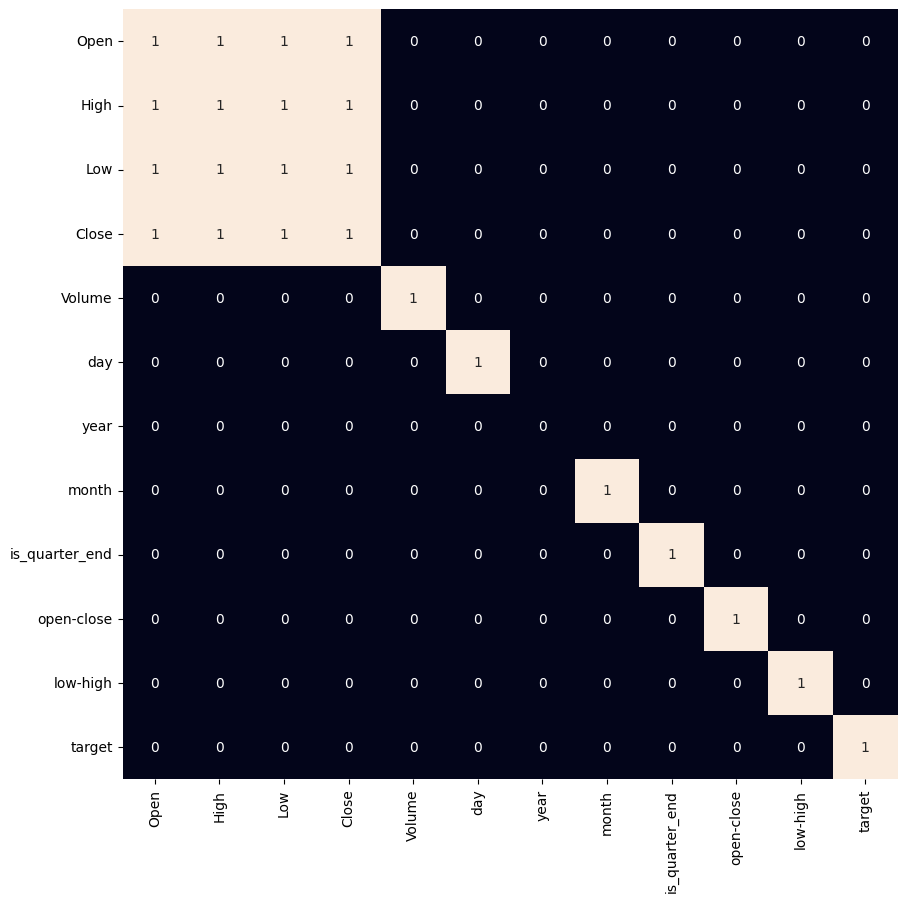

In [46]:
plt.figure(figsize=(10, 10))

sb.heatmap(df.corr() > 0.9, annot=True, cbar=False)
plt.show()

Whole data has been split into two parts with 90/1 ration.

In [48]:
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']
 
scaler = StandardScaler()
features = scaler.fit_transform(features)
 
X_train, X_valid, Y_train, Y_valid = train_test_split(
    features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)

(203, 3) (23, 3)


Train the model. XGBClassifier.

In [49]:
models = [LogisticRegression(), SVC(
  kernel='poly', probability=True), XGBClassifier()]
 
for i in range(3):
  models[i].fit(X_train, Y_train)
 
  print(f'{models[i]} : ')
  print('Training Accuracy : ', metrics.roc_auc_score(
    Y_train, models[i].predict_proba(X_train)[:,1]))
  print('Validation Accuracy : ', metrics.roc_auc_score(
    Y_valid, models[i].predict_proba(X_valid)[:,1]))
  print()

LogisticRegression() : 
Training Accuracy :  0.557012432012432
Validation Accuracy :  0.6363636363636364

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.39044289044289043
Validation Accuracy :  0.4090909090909091

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...) : 
Training Accuracy :  0.9988830613830614
Validation Ac

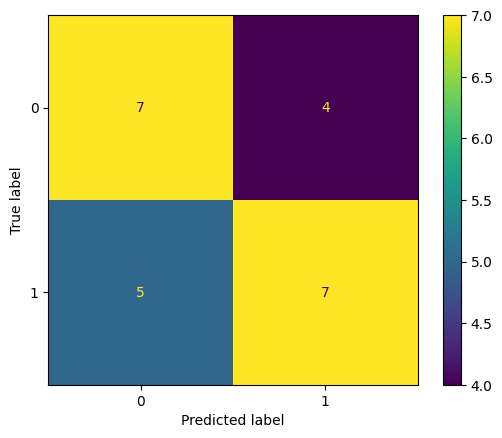

In [50]:
metrics.plot_confusion_matrix(models[0], X_valid, Y_valid)
plt.show()
